# Part I: Departmental and Policy Data Analysis

Goal: Calculate correlation between numPolicies and numkillings and calculate correlation per policy with numkillings.

Step 1: Read and clean data (sidenote: the most  time consuming part of this entire project was getting the policy data, converting it using Optical Character Recognition Software, and then formatting that into the same CSV file)

In [132]:
import csv
import numpy as np

#read CSV
with open('policydept.csv') as csvfile:
    csvthing = csv.reader(csvfile, delimiter=',')
    total=0
    count=0
    readCSV=[]
    for row in csvthing:
        readCSV.append(row)

    #dictify row 1
    querydict={}
    labels=readCSV[0]
    for el in labels:
        name=el
        querydict[name]=count
        count=count+1
    count=0

    #dictify column 1
    deptdict={}
    for row in readCSV:
        if row[0]!='City':
            dept=row[0]
            deptdict[dept]=count
            count=count+1
    count=0
    
    print(deptdict)
    print(querydict)

{'Albuquerque': 0, 'Anaheim': 1, 'Anchorage': 2, 'Arlington': 3, 'Atlanta': 4, 'Aurora': 5, 'Austin': 6, 'Bakersfield': 7, 'Baltimore': 8, 'Baton Rouge': 9, 'Boston': 10, 'Buffalo': 11, 'Chandler': 12, 'Charlotte': 13, 'Chicago': 14, 'Chula Vista': 15, 'Cincinnati': 16, 'Cleveland': 17, 'Columbus': 18, 'Corpus Christi': 19, 'Dallas': 20, 'Denver': 21, 'Detroit': 22, 'Durham': 23, 'Fort Worth': 24, 'Fremont': 25, 'Fresno': 26, 'Garland': 27, 'Glendale': 28, 'Greensboro': 29, 'Henderson': 30, 'Honolulu': 31, 'Houston': 32, 'Indianapolis': 33, 'Irvine': 34, 'Irving': 35, 'Jacksonville': 36, 'Kansas City Missouri': 37, 'Laredo': 38, 'Las Vegas': 39, 'Lexington': 40, 'Lincoln': 41, 'Los Angeles': 42, 'Louisville': 43, 'Lubbock': 44, 'Madison': 45, 'Mesa': 46, 'Miami': 47, 'Milwaukee': 48, 'Minneapolis': 49, 'Nashville': 50, 'New Orleans': 51, 'New York': 52, 'Newark': 53, 'Norfolk': 54, 'North Las Vegas': 55, 'Oakland': 56, 'Oklahoma City': 57, 'Omaha': 58, 'Orlando': 59, 'Philadelphia': 60

## Correlation with Number of Policies

Getting data from the CSV file about policies, and police homicide rates

In [143]:
nps=[]
rates=[]
ratebs=[]
disps=[]
for dept in deptdict.keys():
    print('dept is', dept)
    i=deptdict[dept]+1
    j=querydict['numPolicies']
    nP=int(readCSV[i][j])
    nps.append(nP)
    print('numPolicies is', nP)
    j=querydict['killingsPerMillion']
    rate=float(readCSV[i][j])
    rates.append(rate)
    rateb=float(readCSV[i][querydict['Avg Annual Police Homicide Rate for Black People']])
    ratebs.append(rateb)
    print('police homicide rate is', rate)
    disp=float(readCSV[i][querydict['Black-White Disparity']])+float(readCSV[i][querydict['Hispanic-White Disparity']])
    disps.append(disp)
    print('racial disparity is ',disp)
    print()

dept is Albuquerque
numPolicies is 5
police homicide rate is 9.2
racial disparity is  5.28

dept is Anaheim
numPolicies is 3
police homicide rate is 17.8
racial disparity is  12.29

dept is Anchorage
numPolicies is 3
police homicide rate is 10.3
racial disparity is  2.07

dept is Arlington
numPolicies is 5
police homicide rate is 8.2
racial disparity is  5.4399999999999995

dept is Atlanta
numPolicies is 2
police homicide rate is 9.5
racial disparity is  6.79

dept is Aurora
numPolicies is 3
police homicide rate is 18.5
racial disparity is  3.4299999999999997

dept is Austin
numPolicies is 3
police homicide rate is 12.7
racial disparity is  2.04

dept is Bakersfield
numPolicies is 1
police homicide rate is 20.1
racial disparity is  5.27

dept is Baltimore
numPolicies is 2
police homicide rate is 12.9
racial disparity is  3.84

dept is Baton Rouge
numPolicies is 2
police homicide rate is 13.1
racial disparity is  40.0

dept is Boston
numPolicies is 4
police homicide rate is 4.9
racial d

As shown below there isn't the greatest negative correlation between number of policies and rate of killings. This could be due to varied crime rates and implementation of policies. I decided it might be better to look at individual policies

array([[ 1.        , -0.13237558],
       [-0.13237558,  1.        ]])

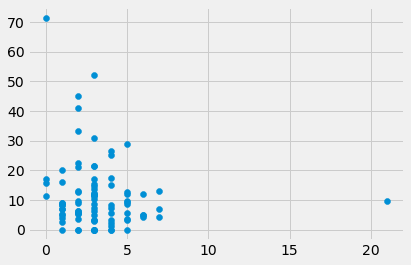

In [134]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

plt.scatter(nps,ratebs)
np.corrcoef(nps,ratebs)

Looking at individual policies still didn't show the most correlation either. This made me realize that there was an even bigger problem.

reqDe_esc
-0.12887582417702043
banChoke&Stanglehold
-0.1475272056900715
duty2intervene
0.032847744429547895
warnb4shoot
0.05944271195182177
cantShootVehicles
-0.08399327584871505
reqCompRep
-0.13546125921496016
reqExhOthMeans
-0.2193426798150517
forceContinuum
-0.09846553606590815
numPolicies
-0.13237558427720533


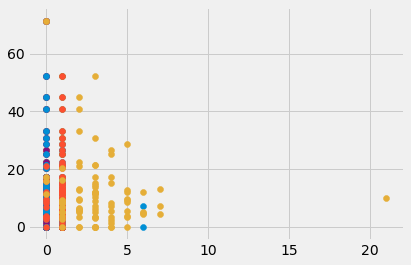

In [137]:
for j in range(32,41):
    policys=[]
    print(readCSV[0][j])
    for dept in deptdict.keys():
        i=deptdict[dept]+1
        nP=int(readCSV[i][j])
        policys.append(nP)
    plt.scatter(policys,ratebs)
    print('correlation:',np.corrcoef(policys,ratebs)[0][1])


I then restricted to similar cities to avoid noise due to differing factors. I thought it would be ideal to compare a city to itself before the policy but I didn't have that data so I had to use similar cities. As shown below, this effectively revealed that policies really did correlate to lower rates of police homicide.

In [138]:
def lookAtCities(bigcities,s):
    ratesrestricted=[]
    for dept in bigcities:
        i=deptdict[dept]+1
        query='Avg Annual Police Homicide Rate'+s
        j=querydict[query]
        rate=float(readCSV[i][j])
        ratesrestricted.append(rate)
    for j in range(32,40):
        policys=[]
        print(readCSV[0][j])
        for dept in bigcities:
            i=deptdict[dept]+1
            nP=int(readCSV[i][j])
            policys.append(nP)
        print('correlation:',np.corrcoef(policys,ratesrestricted)[0][1])

#comparing similar cities yield higher negative correlation for most policies
print('Looking at rate of black homicides')
lookAtCities(['Los Angeles','San Francisco','Philadelphia','Orlando'],' for Black People')
lookAtCities(['New Orleans','Baton Rouge','Orlando'],' for Black People')
print()
print('Looking at rate of white homicides')
lookAtCities(['Los Angeles','San Francisco','Philadelphia','Orlando'],'')
lookAtCities(['New Orleans','Baton Rouge','Orlando'],'')

Looking at rate of black homicides
reqDe_esc
correlation: -0.8023523120382242
banChoke&Stanglehold
correlation: -0.8866893060253892
duty2intervene
correlation: -0.8866893060253892
warnb4shoot
correlation: -0.4603963704362598
cantShootVehicles
correlation: -0.8023523120382242
reqCompRep
correlation: 0.27073237522762167
reqExhOthMeans
correlation: -0.8023523120382242
forceContinuum
correlation: nan
reqDe_esc
correlation: -0.867905990102077
banChoke&Stanglehold
correlation: -0.867905990102077
duty2intervene
correlation: -0.867905990102077
warnb4shoot
correlation: nan
cantShootVehicles
correlation: -0.867905990102077
reqCompRep
correlation: -0.867905990102077
reqExhOthMeans
correlation: 0.0037735043047916078
forceContinuum
correlation: nan

Looking at rate of white homicides
reqDe_esc
correlation: -0.40549048061470516
banChoke&Stanglehold
correlation: -0.5508471485570137
duty2intervene
correlation: -0.5508471485570137
warnb4shoot
correlation: -0.6610165782684164
cantShootVehicles
correlati

Finally, I thought that maybe bucketing homicide rates based on number of policies might reveal some larger trend since I saw a graphic indicating so published by Campaign Zero, who provided the policies dataset. After doing this I realized they slightly painted the picture brighter than it was by drawing the below graph in a distorted way. It probably would have been better for them to compare similar cities to get the trend they were looking for.

correlation: -0.394692191136013


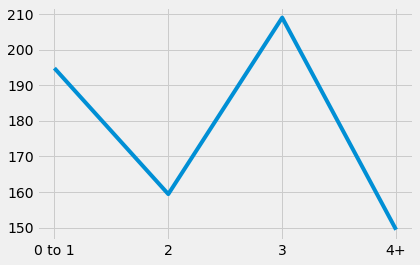

In [144]:
import numpy as np
labels=['0 to 1','2','3','4+']
labelsn=[0,1,2,3]
lowest=0
ok=0
better=0
best=0
for row in readCSV:
    if row[0]!='City':
        nP=int(row[40])
        k=float(row[42])
        if nP<2:
            lowest=lowest+k
        elif nP==2:
            ok=ok+k
        elif nP==3:
            better=better+k
        elif nP>4:
            best=best+k
killings=[lowest,ok,better,best]
plt.plot(labels,killings)
print('correlation:',np.corrcoef(labelsn,killings)[0][1])

# Part II: State Specific Data Analysis

In [145]:
import csv
#can use rate of death estimates to estimate p-values?

#read csv
with open('states.csv') as csvfile:
    csvthing = csv.reader(csvfile, delimiter=',')
    total=0
    count=0
    readCSV=[]
    for row in csvthing:
        readCSV.append(row)

    #dictify row 1
    querydict={}
    labels=readCSV[0]
    for el in labels:
        name=el
        querydict[name]=count
        count=count+1
    count=0

    #dictify column 1
    statedict={}
    for row in readCSV:
        if row[0]!='State':
            state=row[0]
            statedict[state]=count
            count=count+1
    count=0
    
    print(statedict)
    print(querydict)

{'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'District of Columbia': 8, 'Florida': 9, 'Georgia': 10, 'Hawaii': 11, 'Idaho': 12, 'Illinois': 13, 'Indiana': 14, 'Iowa': 15, 'Kansas': 16, 'Kentucky': 17, 'Louisiana': 18, 'Maine': 19, 'Maryland': 20, 'Massachusetts': 21, 'Michigan': 22, 'Minnesota': 23, 'Mississippi': 24, 'Missouri': 25, 'Montana': 26, 'Nebraska': 27, 'Nevada': 28, 'New Hampshire': 29, 'New Jersey': 30, 'New Mexico': 31, 'New York': 32, 'North Carolina': 33, 'North Dakota': 34, 'Ohio': 35, 'Oklahoma': 36, 'Oregon': 37, 'Pennsylvania': 38, 'Rhode Island': 39, 'South Carolina': 40, 'South Dakota': 41, 'Tennessee': 42, 'Texas': 43, 'Utah': 44, 'Vermont': 45, 'Virginia': 46, 'Washington': 47, 'West Virginia': 48, 'Wisconsin': 49, 'Wyoming': 50}
{'State': 0, 'Population': 1, 'African-American Alone': 2, '% African-American': 3, '% Victims Black': 4, 'Disparity': 5, '# Black people killed': 6, '# Hispan

## Ex.1 Alabama

We can look at the state of Alabama as an example before algorithmically analyzing all of the states. I used bayesian probability to derive how to calculate the rate of police homicide given race in a given state. The derivation of this (and thus all following formulas) is shown on my github using Bayes theoerem. Then using this probability and assuming a Poisson distribution(a probability distribution where something happens at a rate) I calculated the rate of homicide. This revealed significant racial disparities. Also if these numbers sound very large, it's important to remember these homicides include armed victims.

In [63]:
pb1=float(readCSV[statedict['Alabama']+1][6])/float(readCSV[statedict['Alabama']+1][2].replace(',',''))
print('the probability that someone is killed by an officer given theyre black is',pb1)
#calculating lambda=p*n
print('the rate of killing per 100k is thus',(pb1*100000))
rate1=pb1*100000

whitepop=float(readCSV[statedict['Alabama']+1][17])*int(readCSV[statedict['Alabama']+1][1].replace(',', ''))
pb2=float(readCSV[statedict['Alabama']+1][11])/(whitepop)
print('the probability that someone is killed by an officer given theyre white is',pb2)
#calculating lambda=p*n
print('the rate of killing per 100k is thus',pb2*100000)
rate2=pb2*100000

pb3=(float(readCSV[statedict['Alabama']+1][6])+float(readCSV[statedict['Alabama']+1][7])
    +float(readCSV[statedict['Alabama']+1][8])+float(readCSV[statedict['Alabama']+1][9])
    +float(readCSV[statedict['Alabama']+1][10]))/(int(readCSV[statedict['Alabama']+1][1].replace(',', ''))-whitepop)
print('the probability that someone is killed by an officer given theyre not white is',pb3)
#calculating lambda=p*n
print('the rate of killing per 100k is thus',pb3*100000)
rate3=pb3*100000

bwdisparity =rate1-rate2
print('the black-white disparity is ',bwdisparity)

disparity=rate3-rate2
print('the disparity is ',disparity)


the probability that someone is killed by an officer given theyre black is 3.915893011409634e-05
the rate of killing per 100k is thus 3.9158930114096338
the probability that someone is killed by an officer given theyre white is 2.250663165826681e-05
the rate of killing per 100k is thus 2.250663165826681
the probability that someone is killed by an officer given theyre not white is 3.0767143526213957e-05
the rate of killing per 100k is thus 3.0767143526213956
the black-white disparity is  1.6652298455829526
the disparity is  0.8260511867947145


## Ex.2 Iterating Through States

In [64]:
disparities=[]
for state in statedict.keys():
    print("")
    pb1=float(readCSV[statedict[state]+1][6])/float(readCSV[statedict[state]+1][2].replace(',', ''))
    print('the probability that someone is killed by an officer in',state,'given theyre black is',pb1)
    rate1=pb1*100000
    print('the rate of killing per 100k is thus',rate1)
    
    whitepop=float(readCSV[statedict[state]+1][17])*int(readCSV[statedict[state]+1][1].replace(',', ''))
    pb2=float(readCSV[statedict[state]+1][11])/(whitepop)
    print('the probability that someone is killed by an officer',state,'given theyre white is',pb2)
    rate2=pb2*100000
    print('the rate of killing per 100k is thus',rate2)
    
    pb3=(float(readCSV[statedict[state]+1][6])+float(readCSV[statedict[state]+1][7])
    +float(readCSV[statedict[state]+1][8])+float(readCSV[statedict[state]+1][9])
    +float(readCSV[statedict[state]+1][10]))/(int(readCSV[statedict[state]+1][1].replace(',', ''))-whitepop)
    print('the probability that someone is killed by an officer given theyre not white is',pb3)
    print('the rate of killing per 100k is thus',pb3*100000)
    rate3=pb3*100000
    
    bwdisparity =rate1-rate2
    print('the black-white disparity is ',bwdisparity)
    disparity=rate3-rate2
    disparities.append(disparity)
    print('the disparity is ',disparity)
    print("")


the probability that someone is killed by an officer in Alabama given theyre black is 3.915893011409634e-05
the rate of killing per 100k is thus 3.9158930114096338
the probability that someone is killed by an officer Alabama given theyre white is 2.250663165826681e-05
the rate of killing per 100k is thus 2.250663165826681
the probability that someone is killed by an officer given theyre not white is 3.0767143526213957e-05
the rate of killing per 100k is thus 3.0767143526213956
the black-white disparity is  1.6652298455829526
the disparity is  0.8260511867947145


the probability that someone is killed by an officer in Alaska given theyre black is 0.00017194686841765893
the rate of killing per 100k is thus 17.194686841765893
the probability that someone is killed by an officer Alaska given theyre white is 3.0006399903462487e-05
the rate of killing per 100k is thus 3.0006399903462486
the probability that someone is killed by an officer given theyre not white is 6.137403688341341e-05
the

In [65]:
avg=np.sum(disparities)/len(disparities)
print('national disparity is',avg)

national disparity is 1.3214192025732312


# Part III: Aggregate Data and Joint Sampling

In [66]:
with open('aggregate.csv') as csvfile:
    csvthing = csv.reader(csvfile, delimiter=',')
    total=0
    count=0
    readCSV=[]
    for row in csvthing:
        readCSV.append(row)
        
#dictify row 1
    querydict={}
    labels=readCSV[0]
    for el in labels:
        name=el
        querydict[name]=count
        count=count+1
    count=0

    print(querydict)
        

{"\ufeffVictim's name": 0, "Victim's age": 1, "Victim's gender": 2, "Victim's race": 3, 'URL of image of victim': 4, 'Date of Incident (month/day/year)': 5, 'Street Address of Incident': 6, 'City': 7, 'State': 8, 'Zipcode': 9, 'County': 10, 'Agency responsible for death': 11, 'Cause of death': 12, 'A brief description of the circumstances surrounding the death': 13, 'Official disposition of death (justified or other)': 14, 'Criminal Charges?': 15, 'Link to news article or photo of official document': 16, 'Symptoms of mental illness?': 17, 'Unarmed': 18, 'Alleged Weapon (Source: WaPo)': 19, 'Alleged Threat Level (Source: WaPo)': 20, 'Fleeing (Source: WaPo)': 21, 'Body Camera (Source: WaPo)': 22, 'WaPo ID (If included in WaPo database)': 23}


In [67]:
##### n=1000000
wcount=0
for row in readCSV:
        if row[3]=='White' or row[3]=='white':
            wcount=wcount+1
            
bcount=0
for row in readCSV:
        if row[3]=='Black' or row[3]=='black':
            bcount=bcount+1

ncount=0
for row in readCSV:
        if row[3]=='Unknown Race' or row[3]=='?':
            ncount=ncount+1
tcount=len(readCSV)-1

#prob of police homicide
probPoliceHomicide= tcount/327000000 #P(H)
ratePoliceHomicide=n*probPoliceHomicide 

#prob of police homicide involving someone white
probWHomicide= wcount/327000000 #P(W,H)
rateWHomicide=n*probWHomicide
probHomicidegW=probWHomicide/(0.607) #P(H|W)
rateHomicidegW=n*probHomicidegW

#prob of shooting someone black
probBHomicide= bcount/327000000 #P(B,H)
rateBHomicide=n*probBHomicide
probHomicidegB=probBHomicide/(0.14) #P(B|H)
rateHomicidegB=n*probHomicidegB

print(rateHomicidegW,'police homicides of white people per million in America')
print(rateHomicidegB,'police homicides of black people per million in America')


#prob of police homicide involving someone black and unarmed
ucount=0
for row in readCSV:
    if row[18]=='Unarmed' or row[18]=='unarmed':
        ucount=ucount+1
probUH=ucount/327000000

probHgU=probUH/probPoliceHomicide

ucount=0
for row in readCSV:
    if (row[18]=='Unarmed' or row[18]=='unarmed') and (row[3]=='Black' or row[3]=='black'):
        ucount=ucount+1
probBUH=ucount/327000000

probBgUH=probBUH/probHgU

ucount=0
for row in readCSV:
    if row[18]=='Armed' or row[18]=='Allegedly Armed':
        ucount=ucount+1
probAH=ucount/327000000

ucount=0
for row in readCSV:
    if (row[18]=='Armed' or row[18]=='Allegedly Armed') and (row[3]=='Black' or row[3]=='black'):
        ucount=ucount+1
probBAH=ucount/327000000

probHgA=probAH/probPoliceHomicide
probBgAH=probBAH/probHgA

probB=.14
probU=.99 # approximated, 3 million Americans carry guns daily, more probably carry occasionally/illegally
#this data obviously doesn't exist, so i had to make a generous guess

probBgU=probB*probU

probHgBU=(probBgUH*probHgU)/probBgU
print('probability of a police homicide, given a black unarmed victim is',probHgBU)
print(probHgBU*1000000,'per million')


#prob of police homicide involving someone white and unarmed
ucount=0
for row in readCSV:
    if (row[18]=='Unarmed' or row[18]=='unarmed') and (row[3]=='White' or row[3]=='white'):
        ucount=ucount+1
probWUH=ucount/327000000

probWgUH=probWUH/probHgU

ucount=0
for row in readCSV:
    if (row[18]=='Armed' or row[18]=='Allegedly Armed') and (row[3]=='White' or row[3]=='white'):
        ucount=ucount+1
probWAH=ucount/327000000

probWgAH=probWAH/probHgA

probW=.613

probWgU=probW*probU

probHgWU=(probWgUH*probHgU)/probWgU
print('probability of a police homicide, given a white unarmed victim is',probHgWU)
print(probHgWU*1000000,'per million')

print('the disparity is now even larger as the rate of murder is around 4 times larger for unarmed black people')

15.517232692995579 police homicides of white people per million in America
38.663171690694625 police homicides of black people per million in America
probability of a police homicide, given a black unarmed victim is 8.031384178173169e-06
8.03138417817317 per million
probability of a police homicide, given a white unarmed victim is 2.232339811099707e-06
2.232339811099707 per million
the disparity is now even larger as the rate of murder is around 4 times larger for unarmed black people


We can visualize these distributions:

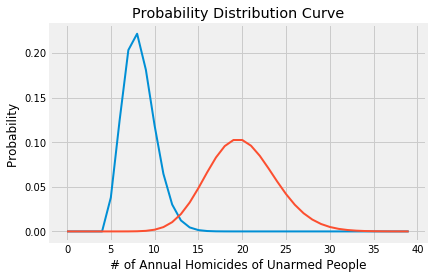

In [68]:
from scipy.stats import poisson

w=poisson(3.27)
b=poisson(15)
arr=[]
for num in range(-5,35):
    arr.append(w.pmf(num))
prob1 = w.pmf(5)
plt.grid(True)
plt.ylabel('Probability ')
plt.xlabel('# of Annual Homicides of Unarmed People')
plt.title('Probability Distribution Curve')
plt.plot(arr, linewidth=2.0)

arr2=[]
for num in range(-5,35):
    arr2.append(b.pmf(num))
prob2 = b.pmf(12)
plt.grid(True)
plt.plot(arr2, linewidth=2.0)

In [98]:
probHgB=probHomicidegB
probHgW=probHomicidegW
probHgBA=probHgB-probHgBU
probHgWA=probHgW-probHgWU

def probHomicide(b,w,u):
    if u==1:
        if b==1:
            return probHgBU
        elif w==1:
            return probHgWU
        else:
            return probHgU
    else:
        if b==1:
            return probHgBA
        elif w==1:
            return probHgWA
        else:
            return probHgA

counter=0
for row in readCSV:
    if ("Charged" in str(row[14])) or ("indicted" in str(row[14])) or ("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14])):
        counter=counter+1
pCH=counter/327000000
probCgH=pCH/probPoliceHomicide
print(probCgH, 'is the probability that an officer is charged with homicide given a police homicide')

#assumes homicide occurs, since makeSample only runs this if homicide=1
for row in readCSV:
    c=("Charged" in str(row[14])) or ("indicted" in str(row[14])) or ("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[3]=='Black' or row[3]=='black') and (row[18]=='Unarmed' or row[18]=='unarmed'):
        counter=counter+1
probCBUH=counter/327000000

for row in readCSV:
    c=("Charged" in str(row[14])) or ("indicted" in str(row[14])) or ("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[3]=='White' or row[3]=='white') and (row[18]=='Unarmed' or row[18]=='unarmed'):
        counter=counter+1
probCWUH=counter/327000000

for row in readCSV:
    c=("Charged" in str(row[14])) or ("indicted" in str(row[14])) or ("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[18]=='Unarmed' or row[18]=='unarmed'):
        counter=counter+1
probCUH=counter/327000000

for row in readCSV:
    c=("Charged" in str(row[14])) or ("indicted" in str(row[14])) or ("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[3]=='Black' or row[3]=='black') and (row[18]=='Allegedly Armed' or row[18]=='Armed'):
        counter=counter+1
probCBAH=counter/327000000

for row in readCSV:
    c=("Charged" in str(row[14])) or ("indicted" in str(row[14])) or ("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[3]=='White' or row[3]=='white') and (row[18]=='Allegedly Armed' or row[18]=='Armed'):
        counter=counter+1
probCWAH=counter/327000000

for row in readCSV:
    c=("Charged" in str(row[14])) or ("indicted" in str(row[14])) or ("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[18]=='Allegedly Armed' or row[18]=='Armed'):
        counter=counter+1
probCAH=counter/327000000

probCgBUH=probCBUH/(probBUH)#need to have homicide in the denominator as it's implied in the numerator
probCgWUH=probCWUH/(probWUH)
probCgUH=probCUH/probUH

probCgBAH=probCBAH/(probBAH)
probCgWAH=probCWAH/(probWAH)
probCgAH=probCAH/probAH

#again assumes homicide occurs, since makeSample only runs this if homicide=1
def probCharges(black,white,unarmed):
    counter=0
    if unarmed==1:
        #P(C|B=1,W=0,U=1)=P(C,B=1,W=0,U=1)/P(B=1,W=0,U=1)
        if black==1:
            return probCgBUH
        #P(C,B=0,W=1,U=1)/P(B=0,W=1,U=1)
        elif white==1:
            return probCgWUH
        #P(C,B=0,W=0,U=1)/P(B=0,W=0,U=1)
        else:
            return probCgUH
    else:
        #P(C,B=1,W=0,U=0)/P(B=1,W=0,U=0)
        if black==1:
            return probCgBAH
        #P(C,B=0,W=1,U=0)/P(B=0,W=1,U=0)
        elif white==1:
            return probCgWAH
        #P(C,B=0,W=0,U=0)/P(B=0,W=0,U=0)
        else:
            return probCgAH

0.019455822118197776 is the probability that an officer is charged with homicide given a police homicide


In [99]:
print(probCgBUH, 'is the probability of an officer being charged given they shot someone black and unarmed')
print(probCgWUH, 'is the probability of an officer being charged given they shot someone white and unarmed')

0.4697802197802198 is the probability of an officer being charged given they shot someone black and unarmed
0.471783295711061 is the probability of an officer being charged given they shot someone white and unarmed


In [100]:
#prob conviction
counter=0
for row in readCSV:
    if ("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14])):
        counter=counter+1
pVH=counter/327000000
probVgH=pVH/probPoliceHomicide
print(probVgH, 'is the probability that an officer is convicted of homicide given a police homicide')

#assumes homicide occurs, since makeSample only runs this if homicide=1
for row in readCSV:
    c=("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[3]=='Black' or row[3]=='black') and (row[18]=='Unarmed' or row[18]=='unarmed'):
        counter=counter+1
probVCBUH=counter/327000000

for row in readCSV:
    c=("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[3]=='White' or row[3]=='white') and (row[18]=='Unarmed' or row[18]=='unarmed'):
        counter=counter+1
probVCWUH=counter/327000000

for row in readCSV:
    c=("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[18]=='Unarmed' or row[18]=='unarmed'):
        counter=counter+1
probVCUH=counter/327000000

for row in readCSV:
    c=("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[3]=='Black' or row[3]=='black') and (row[18]=='Allegedly Armed' or row[18]=='Armed'):
        counter=counter+1
probVCBAH=counter/327000000

for row in readCSV:
    c=("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[3]=='White' or row[3]=='white') and (row[18]=='Allegedly Armed' or row[18]=='Armed'):
        counter=counter+1
probVCWAH=counter/327000000

for row in readCSV:
    c=("Murder" in str(row[14])) or ("Criminal" in str(row[14])) or ("Convicted" in str(row[14]))
    if c and (row[18]=='Allegedly Armed' or row[18]=='Armed'):
        counter=counter+1
probVCAH=counter/327000000

probVgCBUH=probVCBUH/(probCBUH)#need to have homicide in the denominator as it's implied in the numerator
probVgCWUH=probVCWUH/(probCWUH)
probVgCUH=probVCUH/probUH

probVgCBAH=probVCBAH/(probCBAH)
probVgCWAH=probVCWAH/(probCWAH)
probVgCAH=probVCAH/probCAH

#again assumes homicide occurs, since makeSample only runs this if homicide=1
def probConviction(black,white,unarmed):
    counter=0
    if unarmed==1:
        #P(C|B=1,W=0,U=1)=P(C,B=1,W=0,U=1)/P(B=1,W=0,U=1)
        if black==1:
            return probVgCBUH
        #P(C,B=0,W=1,U=1)/P(B=0,W=1,U=1)
        elif white==1:
            return probVgCWUH
        #P(C,B=0,W=0,U=1)/P(B=0,W=0,U=1)
        else:
            return probVgCUH
    else:
        #P(C,B=1,W=0,U=0)/P(B=1,W=0,U=0)
        if black==1:
            return probVgCBAH
        #P(C,B=0,W=1,U=0)/P(B=0,W=1,U=0)
        elif white==1:
            return probVgCWAH
        #P(C,B=0,W=0,U=0)/P(B=0,W=0,U=0)
        else:
            return probVgCAH

0.008777062609713282 is the probability that an officer is convicted of homicide given a police homicide


In [112]:
print(probVgCBUH, 'is the probability of an officer being convicted given they shot someone black and unarmed')
print(probVgCWUH, 'is the probability of an officer being convicted given they shot someone white and unarmed')

0.4327485380116959 is the probability of an officer being convicted given they shot someone black and unarmed
0.4736842105263158 is the probability of an officer being convicted given they shot someone white and unarmed


It becomes very difficult to model with different parameters after the addition of the charges event, so we need some way to model this Bayesian network of events. Joint sampling works well.

In [113]:
import random

# joint sampling 
def bern(p):
    event = random.random() < p
    if event: return 1
    else: return 0
    
def makeSample():
    observation=[]
    unarmed = bern(0.99)
    black = bern(0.14)
    if black!=1:
        white=bern(.613)
    else:
        white=0
    homicide=bern(probHomicide(black,white,unarmed))
    if homicide==1:
        charges=bern(probCharges(black,white,unarmed))
    else:
        charges=0
    if charges==1:
        conviction=probConviction(black,white,unarmed)
    else:
        conviction=0
    observation = [unarmed,black,white,homicide,charges,conviction]
    return observation
    
def makeSamples(n):
    samples=[]
    for i in range(n):
        samples.append(makeSample())
    return samples        

samples=makeSamples(1000000)

In [124]:
def probSample(a,an): #P(a=an)
    counter=0
    for s in samples:
        if (s[a]==an):
            counter=counter+1
    count = counter
    total=327000000
    return count/total

def probSample1(a,b,an,bn): #P(a=an|b=bn)
    keptsamples = []
    for s in samples:
        if (s[b]==bn):
            keptsamples.append(s)
    total = len(keptsamples)
    count=0
    for s in keptsamples:
        if s[a]==an:
            count=count+1
    return count/total

def probSample2(a,b,c,an,bn,cn): #P(a=an|b=bn,c=cn)
    keptsamples = []
    for s in samples:
        if (s[b]==bn and s[c]==cn):
            keptsamples.append(s)
    total = len(keptsamples)
    count=0
    for s in keptsamples:
        if s[a]==an:
            count=count+1
    return count/total

def probSample3(a,b,c,d,an,bn,cn,dn): #P(a|b,c,d)
    keptsamples = []
    for s in samples:
        if (s[b]==bn and s[c]==cn and s[d]==dn):
            keptsamples.append(s)
    total = len(keptsamples)
    count=0
    for s in keptsamples:
        if s[a]==an:
            count=count+1
    return count/total

In [131]:
print(probSample2(4,1,3,1,1,1))
print(probSample2(4,2,3,1,1,1))

print(probSample2(5,1,3,1,1,1))
print(probSample2(5,2,3,1,1,1))

print(probSample2(5,1,3,1,1,1))
print(probSample2(5,2,3,1,1,1))

0.3333333333333333
0.3333333333333333
0.0
0.0


# FUTURE WORK

# P-values?

In [39]:
# we can now calcualte p-values for a national disparity?
# that would require two generated samples of b/w populations
# and drawing out 
import random
def pvalue(universalSample,hopes):
    s=universalSample
    n=wcount
    m=tcount-wcount
    count=0
    for i in range(10000):
        r1=random.choices(s,k=n)
        sum1=0
        for i in r1:
            sum1=sum1+int(i)
        r2=random.choices(s,k=m)
        sum2=0
        for i in r2:
            sum2=sum2+int(i)
        rate1=sum1/float(n)
        rate2=sum2/float(m)
        ratediff=abs(rate1-rate2)
        if ratediff>hopes:
            count=count+1
    return count/10000

print(pvalue(np.ones(tcount),13.214192025732315))

0.0


# Creating a GUI for a Probability Calculator

In [168]:
import PySimpleGUI as sg

layout = [ [sg.Txt('Enter values to calculate')],      
           [sg.In(size=(8,1), key='numerator')],      
           [sg.Txt('_'  * 10)],      
           [sg.In(size=(8,1), key='denominator')],      
           [sg.Txt('', size=(8,1), key='output')  ],      
           [sg.Button('Calculate', bind_return_key=True)]]

window = sg.Window('Math', layout)

while True:      
    event, values = window.Read()

    if event is not None:      
        try:      
            numerator = float(values['numerator'])      
            denominator = float(values['denominator'])      
            calc = numerator / denominator      
        except:      
            calc = 'Invalid'

        window.Element('output').Update(calc)      
    else:      
        break